In [2]:
import sys
import snsim
import numpy as np
import matplotlib.pyplot as plt
from astropy.time import Time
import pandas as pd 

## Config Generator Class

In [3]:
randseed = 1234 #random seed for generation
n_obj = 10000 #number of SN to generate
z_range = [0.02, 0.1] #redshift range to extract SN redshift

#time range of SNIa observation to extract t0 for each object
time_range = ["2021-08-03", "2022-08-03"]
time_range=[Time(time_range[0]).mjd, Time(time_range[1]).mjd]


snia_gen = {'M0': 'jla', #'jla' is a default value, you can just put a number
            'sigM': 0.12,# intrinsic scatter of SNIA in Hubble Diagram
            'mass_step': 2,
            'model_name': 'salt2',
            'alpha': 0.14,
            'beta': 2.9,
            'dist_x1': 'N21',#default value, you can use gauss distribution [mean,sig] or
                             # asymmetric gaussian [mean,sig1,sig2]
            'dist_c': [-0.055, 0.023, 0.150]#asym gaussian for generate c parameter of salt model
                            } #a
                                                                    

cosmology = {'name':'planck18'} #cosmology, in astropy format


#CMB dipole, in this case is set to 0
cmb = {'v_cmb': 0,
       'l_cmb':0,
       'b_cmb':0}

#host file config
host_conf ={
    'host_file': './test_mock.parquet',
    'key_dic': {'vpec_true': 'vpec' , 'mass':'host_mass', 'SFR':'host_SFR'}, #attention this depend on your mock file 
    'distrib': 'mass'}

host = snsim.survey_host.SnHost(host_conf)
        
gen_class = getattr(snsim.generators, snsim.generators.__GEN_DIC__['snia_gen'])

# Give the input configuration
SNgenerator = gen_class(snia_gen,
                        snsim.utils.set_cosmo(cosmology),
                        time_range,
                        cmb=cmb,
                        host = host
                       )# there is also a parameter  called geometry to give the fields where extract ra, dec of SNe
                        # in this case we generate SNe full sky



# Gen basic parameters
params = SNgenerator.gen_basic_par(n_obj, randseed)


TypeError: SnHost.random_choice() got an unexpected keyword argument 'cosmology'

In [4]:
snsim.utils.set_cosmo(cosmology)

FlatLambdaCDM(name="Planck18", H0=67.66 km / (Mpc s), Om0=0.30966, Tcmb0=2.7255 K, Neff=3.046, m_nu=[0.   0.   0.06] eV, Ob0=0.04897)

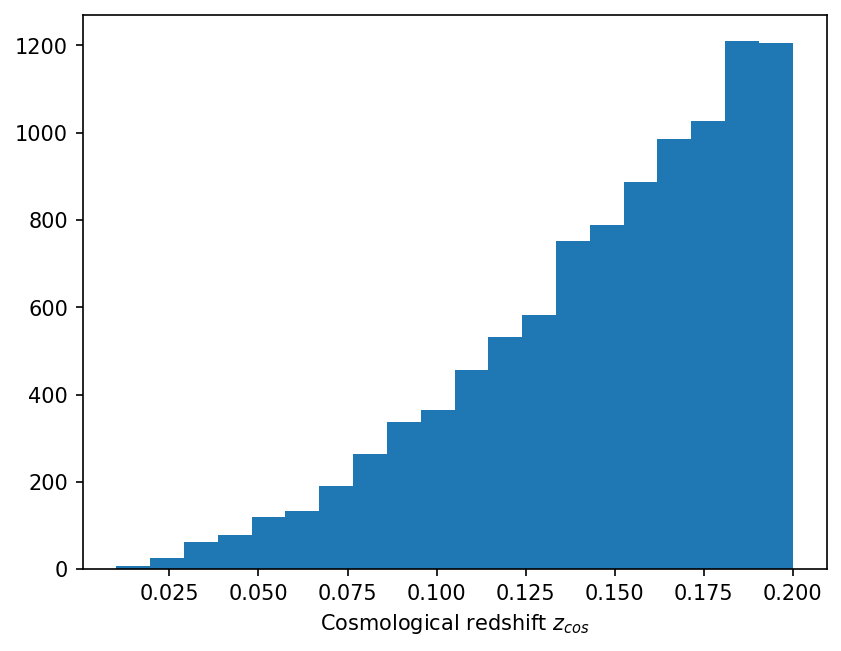

In [3]:
plt.figure(dpi=150)
plt.hist(params['zcos'], bins=20)
plt.xlabel('Cosmological redshift $z_{cos}$')
plt.show()

## simulate SNia

In [4]:
SNs = SNgenerator(n_obj, randseed, astrobj_par=params)


In [5]:
SNs[0]._params

{'ID': 0,
 'zcos': 0.12878672932382101,
 'como_dist': 553.117004052272,
 'z2cmb': 0.0,
 'sim_t0': 59704.946111637255,
 'ra': 2.353487491607666,
 'dec': 1.0973658561706543,
 'vpec': -392.477783203125,
 'host_mass': 11.148139532708505,
 'host_SFR': 6.4951449477279946,
 'mag_sct': 0.12948213879494347,
 'sncosmo': {'x1': -1.0527387100012782,
  'c': 0.14510245728354082,
  'x0': 1.5222184934808557e-05},
 'template': 'salt2'}

## PLOTS

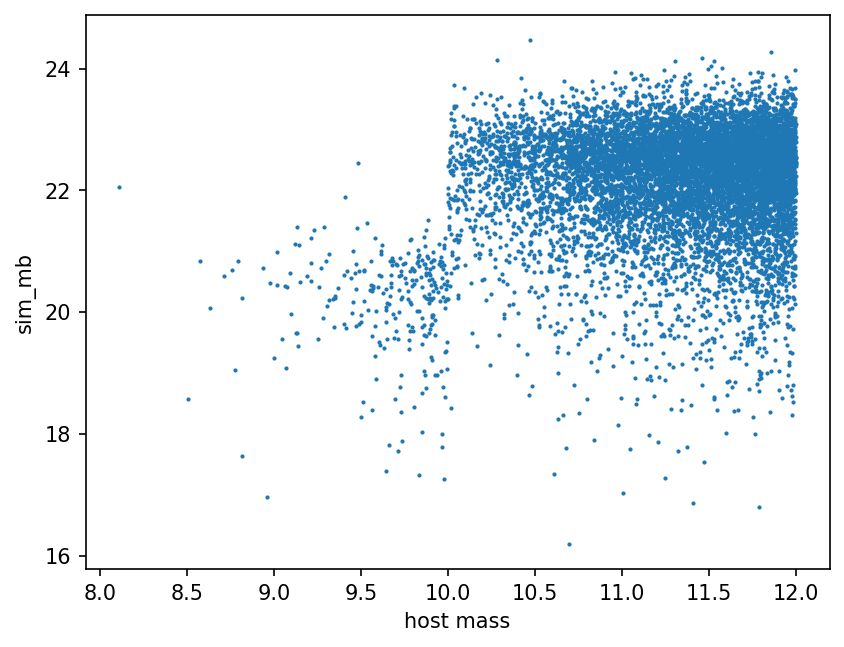

In [6]:
plt.figure(dpi=150)
plt.scatter([SN._params['host_mass'] for SN in SNs], [SN.sim_mb for SN in SNs], s=1)
plt.xlabel('host mass')
plt.ylabel('sim_mb')
plt.show()

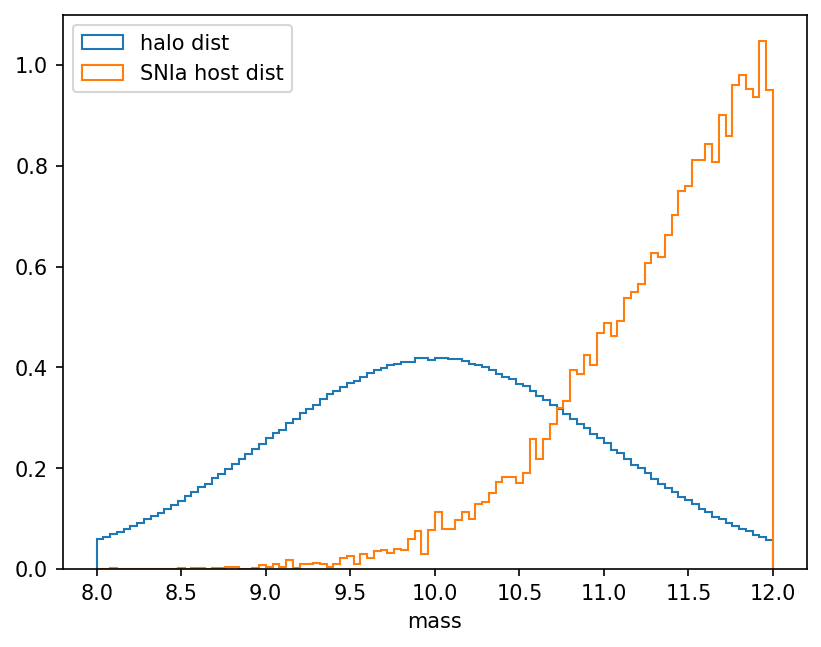

In [9]:
df = pd.read_parquet('./test_mock.parquet')
_,bins=np.histogram(df.mass,100)
plt.figure(dpi=150)
plt.hist(df.mass,bins,histtype='step',density=True,label='halo dist')
plt.hist([SN._params['host_mass'] for SN in SNs],bins,density=True,histtype='step',label='SNIa host dist')
plt.xlabel('mass')
plt.legend(loc='upper left')
plt.show()

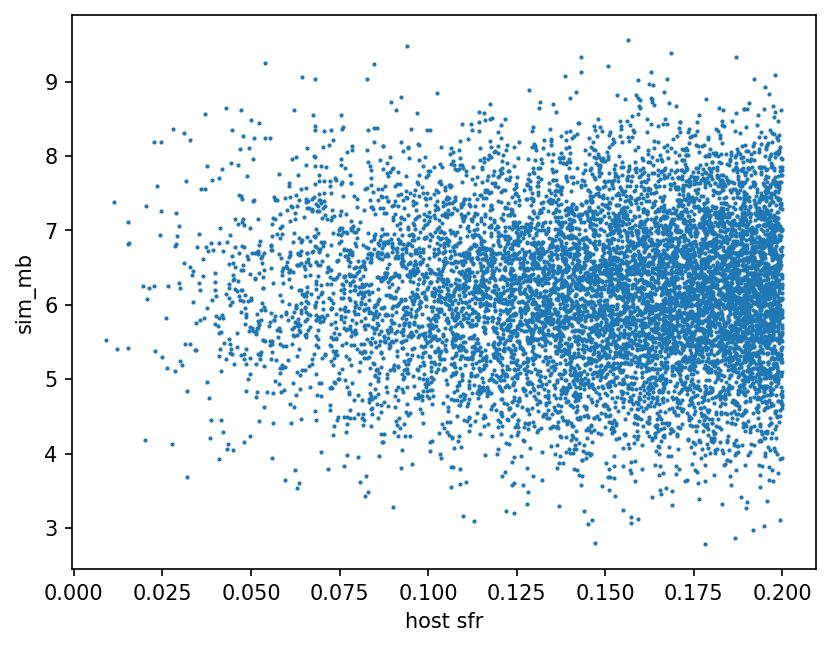

In [37]:
plt.figure(dpi=150)
plt.scatter([SN._params['zcos'] for SN in SNs], [SN._params['host_SFR'] for SN in SNs], s=1)
plt.xlabel('host sfr')
plt.ylabel('sim_mb')
plt.show()

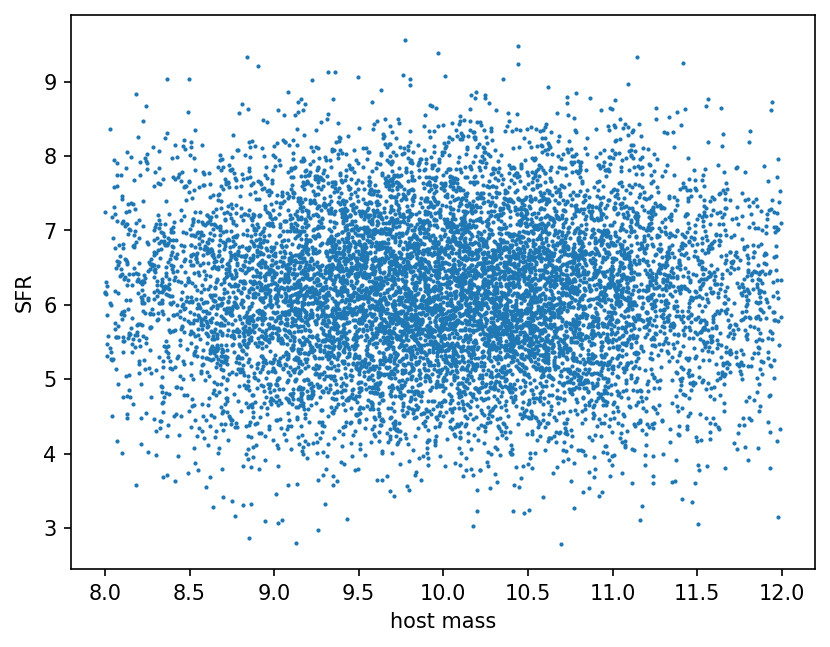

In [38]:
plt.figure(dpi=150)
plt.scatter([SN._params['host_mass'] for SN in SNs], [SN._params['host_SFR'] for SN in SNs], s=1)
plt.xlabel('host mass')
plt.ylabel('SFR')
plt.show()